In [1]:
library(ggplot2)
options(repr.plot.width=5, repr.plot.height=5) # Size of the plots

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


# <font color='#FD7C6E'> Categorical Predictors </font> 

In [2]:
pokemon.df <- read.csv("pokemon.csv")

In [3]:
pokemon.small.df <- pokemon.df[pokemon.df$Type.1 %in% c("Ghost", "Grass", "Dragon", "Fairy"),]
head(pokemon.small.df)

,Name,Type.1,Type.2,Total,HP,Attack,Defense,Sp..Atk,Sp..Def,Speed,Generation,Legendary
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
50,Gloom,Grass,Poison,395,60,65,70,85,75,40,1,False
78,Victreebel,Grass,Poison,490,80,105,65,100,70,70,1,False
101,Haunter,Ghost,Poison,405,45,50,45,115,55,95,1,False
188,Cleffa,Fairy,,218,50,25,28,45,55,15,2,False
198,Bellossom,Grass,,490,75,80,95,90,100,50,2,False


Dummy variables are created automatically by R!

In [4]:
model <- lm(Attack ~ Type.1, data=pokemon.small.df)
summary(model)


Call:
lm(formula = Attack ~ Type.1, data = pokemon.small.df)

Residuals:
   Min     1Q Median     3Q    Max 
 -65.5  -15.5   -5.0   14.5   64.5 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  115.500      8.761  13.183 1.06e-14 ***
Type.1Fairy  -60.500     16.390  -3.691 0.000801 ***
Type.1Ghost  -56.000     13.142  -4.261 0.000159 ***
Type.1Grass  -36.567     11.310  -3.233 0.002780 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 27.7 on 33 degrees of freedom
Multiple R-squared:  0.4198,	Adjusted R-squared:  0.3671 
F-statistic:  7.96 on 3 and 33 DF,  p-value: 0.0003956


## Activity 1: Find the mean of the attack of pokemons type dragon

In [5]:
mean(pokemon.small.df[pokemon.small.df$Type.1=="Dragon",]$Attack)

[1] 115.5

## Activity 2: Find the difference in means of attacks between pokemons type dragon and type fairy

In [6]:
mean(pokemon.small.df[pokemon.small.df$Type.1=="Fairy",]$Attack) - mean(pokemon.small.df[pokemon.small.df$Type.1=="Dragon",]$Attack) 

[1] -60.5

# <font color='#FD7C6E'> Categorical Predictors and Continuous Predictors </font> 

Lets use the brain data again, but now taking into account gender. 1 is Male and 2 is Female.

In [7]:
brain.df <- read.csv("brain.csv")
str(brain.df)

'data.frame':	237 obs. of  3 variables:
 $ gender      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ head_size   : int  4512 3738 4261 3777 4177 3585 3785 3559 3613 3982 ...
 $ brain_weight: int  1530 1297 1335 1282 1590 1300 1400 1255 1355 1375 ...


Gender is of type integer, it should be a factor (category)

In [8]:
brain.df$gender <- as.factor(brain.df$gender)

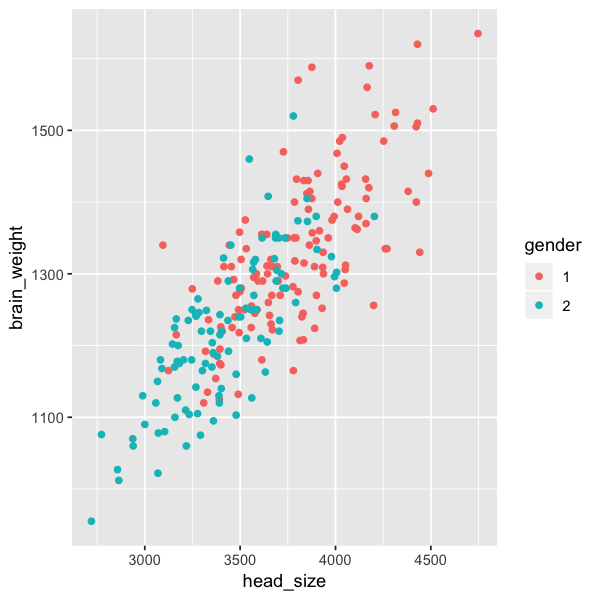

In [9]:
ggplot(data=brain.df, aes(head_size, brain_weight, colour = gender)) + geom_point()

## Activity 3: Create the following linear model
\begin{equation*}
brain\_weight = \beta_0 + \beta_1 * head\_size + \beta_2 * gender
\end{equation*}

In [10]:
model <- lm(brain_weight ~ head_size + gender, data = brain.df)
summary(model)


Call:
lm(formula = brain_weight ~ head_size + gender, data = brain.df)

Residuals:
     Min       1Q   Median       3Q      Max 
-176.671  -52.175    1.487   46.227  236.702 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 378.7139    57.2994   6.609 2.58e-10 ***
head_size     0.2509     0.0150  16.734  < 2e-16 ***
gender2     -17.8615    11.0266  -1.620    0.107    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 72.18 on 234 degrees of freedom
Multiple R-squared:  0.6433,	Adjusted R-squared:  0.6403 
F-statistic:   211 on 2 and 234 DF,  p-value: < 2.2e-16


## Activity 4: What is the RSS of the model? 
Remember: 

\begin{equation*}
RSE = \sqrt{\frac{RSS}{df}}
\end{equation*}

or

\begin{equation*}
RSS = \sum_i{error_i^2}
\end{equation*}




In [11]:
RSS = 72.18^2 * 234
RSS

[1] 1219129

In [12]:
sum(residuals(model)^2)

[1] 1219058

Compare this result with the linear model without the gender from last week, which one has a smaller RSE/RSS?

# <font color='#FD7C6E'> Predictions </font> 

In [13]:
y_hat <- predict(model, brain.df[c("head_size", "gender")])
y_hat

1        2        3        4        5        6        7        8 
1510.965 1316.736 1447.979 1326.523 1426.900 1278.342 1328.530 1271.817 
       9       10       11       12       13       14       15       16 
1285.368 1377.966 1242.708 1380.726 1292.144 1434.679 1340.325 1351.366 
      17       18       19       20       21       22       23       24 
1256.259 1248.480 1155.380 1488.883 1351.868 1394.026 1333.298 1309.710 
      25       26       27       28       29       30       31       32 
1569.937 1488.632 1391.517 1388.004 1245.469 1426.398 1329.032 1331.291 
      33       34       35       36       37       38       39       40 
1408.330 1422.885 1422.132 1335.808 1263.787 1319.246 1215.355 1255.004 
      41       42       43       44       45       46       47       48 
1372.947 1258.267 1461.530 1333.298 1348.104 1391.015 1459.773 1172.946 
      49       50       51       52       53       54       55       56 
1292.395 1293.148 1355.130 1330.538 1450.237 1398.292 1385.494 1246.472 
      57       58       59       60       61       62       63       64 
1354.879 1424.139 1366.172 1299.421 1348.857 1230.161 1493.399 1445.971 
      65       66       67       68       69       70       71       72 
1313.976 1214.101 1235.682 1224.891 1490.388 1478.092 1384.491 1346.849 
      73       74       75       76       77       78       79       80 
1412.847 1396.787 1338.317 1230.412 1271.567 1222.382 1364.917 1341.078 
      81       82       83       84       85       86       87       88 
1339.823 1346.347 1194.025 1276.334 1365.670 1344.842 1209.082 1233.423 
      89       90       91       92       93       94       95       96 
1258.518 1359.145 1422.634 1211.340 1297.665 1357.138 1307.200 1327.025 
      97       98       99      100      101      102      103      104 
1250.236 1254.502 1295.657 1251.491 1255.757 1340.827 1351.366 1297.414 
     105      106      107      108      109      110      111      112 
1286.623 1294.151 1390.513 1231.667 1361.404 1490.388 1305.946 1263.034 
     113      114      115      116      117      118      119      120 
1274.829 1280.600 1227.652 1256.761 1279.346 1357.389 1411.090 1366.674 
     121      122      123      124      125      126      127      128 
1231.667 1432.671 1504.943 1285.619 1395.281 1327.778 1229.659 1162.658 
     129      130      131      132      133      134      135      136 
1395.783 1277.589 1298.668 1265.042 1394.026 1298.919 1077.794 1223.090 
     137      138      139      140      141      142      143      144 
1312.175 1189.464 1139.777 1156.590 1257.218 1246.679 1157.594 1223.592 
     145      146      147      148      149      150      151      152 
1340.280 1339.276 1214.307 1180.681 1226.854 1136.264 1217.318 1194.734 
     153      154      155      156      157      158      159      160 
1284.320 1223.843 1327.733 1152.826 1183.692 1291.095 1366.127 1181.183 
     161      162      163      164      165      166      167      168 
1131.496 1309.163 1251.196 1186.954 1238.398 1134.256 1175.913 1203.517 
     169      170      171      172      173      174      175      176 
1315.186 1255.713 1150.066 1239.903 1256.967 1295.361 1268.009 1164.621 
     177      178      179      180      181      182      183      184 
1266.503 1254.458 1359.352 1247.431 1286.578 1153.328 1365.876 1159.100 
     185      186      187      188      189      190      191      192 
1233.881 1274.784 1272.275 1130.994 1212.550 1290.092 1155.085 1202.513 
     193      194      195      196      197      198      199      200 
1113.679 1286.077 1253.203 1056.715 1128.234 1200.003 1237.394 1188.209 
     201      202      203      204      205      206      207      208 
1204.018 1170.894 1183.190 1327.231 1130.492 1287.331 1214.558 1363.367 
     209      210      211      212      213      214      215      216 
1193.479 1043.415 1097.870 1259.226 1098.372 1110.919 1260.731 1152.826 
     217      218      219      220      221      222      223   

## Activity 5: Calculate the multiple R^2

In [14]:
y <- brain.df$brain_weight
cor.test(y, y_hat)


	Pearson's product-moment correlation

data:  y and y_hat
t = 20.587, df = 235, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7514395 0.8433050
sample estimates:
     cor 
0.802067 


In [15]:
0.802067^2

[1] 0.6433115

# <font color='#FD7C6E'> Multicollinarity </font> 

Lets create a fake predictor "head_size_2" which is the original "head_size" column with an added noise (normally distributed)

In [16]:
summary(brain.df)

 gender    head_size     brain_weight 
 1:134   Min.   :2720   Min.   : 955  
 2:103   1st Qu.:3389   1st Qu.:1207  
         Median :3614   Median :1280  
         Mean   :3634   Mean   :1283  
         3rd Qu.:3876   3rd Qu.:1350  
         Max.   :4747   Max.   :1635  

In [17]:
set.seed(5) # I add this line so that we all get the same random results, take it out and see how the results change
brain.df$head_size_2 <- brain.df$head_size + rnorm(nrow(brain.df), mean=0, sd=10)

In [18]:
summary(brain.df)

 gender    head_size     brain_weight   head_size_2  
 1:134   Min.   :2720   Min.   : 955   Min.   :2727  
 2:103   1st Qu.:3389   1st Qu.:1207   1st Qu.:3383  
         Median :3614   Median :1280   Median :3615  
         Mean   :3634   Mean   :1283   Mean   :3634  
         3rd Qu.:3876   3rd Qu.:1350   3rd Qu.:3875  
         Max.   :4747   Max.   :1635   Max.   :4755  

In [19]:
model <- lm(brain_weight ~ head_size + head_size_2, data = brain.df)
summary(model)


Call:
lm(formula = brain_weight ~ head_size + head_size_2, data = brain.df)

Residuals:
     Min       1Q   Median       3Q      Max 
-173.709  -48.004   -1.069   44.161  247.529 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 324.8686    47.2206   6.880 5.43e-11 ***
head_size     0.5440     0.4715   1.154    0.250    
head_size_2  -0.2803     0.4710  -0.595    0.552    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 72.53 on 234 degrees of freedom
Multiple R-squared:  0.6399,	Adjusted R-squared:  0.6368 
F-statistic: 207.9 on 2 and 234 DF,  p-value: < 2.2e-16


Install the library "car":

Find "r.car" from the Anaconda Environment. The instructions to install new packages are on Lab6 were we installed the library ppcor

In [20]:
library(car)
vif(model)

Loading required package: carData


head_size head_size_2 
   1330.761    1330.761

Bigger VIF values than 10 are bad, this is an exagerated example of Multicollinearity...

In [21]:
cor.test(brain.df$head_size, brain.df$head_size_2)


	Pearson's product-moment correlation

data:  brain.df$head_size and brain.df$head_size_2
t = 559.01, df = 235, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9995145 0.9997091
sample estimates:
      cor 
0.9996242 


# <font color='#FD7C6E'> Selecting between Models </font> 

In [22]:
us.df <- read.csv("us_elections.csv")
str(us.df)

'data.frame':	3111 obs. of  17 variables:
 $ state            : Factor w/ 50 levels "Alabama","Arizona",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ county           : Factor w/ 1808 levels "Abbeville","Acadia",..: 79 86 97 145 160 218 228 239 286 308 ...
 $ trump            : int  18172 72883 5454 6738 22859 1140 4901 32865 7843 8953 ...
 $ clinton          : int  5936 18458 4871 1874 2156 3530 3726 13242 5784 1547 ...
 $ romney           : int  17379 66016 5550 6132 20757 1251 5087 30278 7626 7506 ...
 $ obama            : int  6363 18424 5912 2202 2970 4061 4374 15511 6871 2132 ...
 $ voting_population: int  40690 151770 20375 17590 42430 8195 15425 88525 26480 20505 ...
 $ white_pct        : num  75.7 83.2 45.9 74.8 87.7 ...
 $ black_pct        : num  18.37 9.23 47.89 21.21 1.56 ...
 $ hispanic_pct     : num  2.57 4.37 4.31 2.22 8.73 ...
 $ foreignborn_pct  : num  1.84 3.27 2.86 1.35 4.27 ...
 $ female_pct       : num  51.2 51.2 46.5 46.5 50.5 ...
 $ age29andunder_pct: num  40 35.5 37.7 37.3 37.

In [23]:
us.df$trump_pct <- us.df$trump / us.df$voting_population * 100
us.df$clinton_pct <- us.df$clinton / us.df$voting_population * 100
us.df$obama_pct <- us.df$obama / us.df$voting_population * 100
us.df$romney_pct <- us.df$romney / us.df$voting_population * 100

## Activity 6: Create a new dataframe called "california.df" with only the counties in California

In [24]:
california.df <- us.df[us.df$state=="California",]

In [25]:
model <- lm(trump_pct ~ white_pct + lesscollege_pct + median_income + black_pct + hispanic_pct, data = california.df)
summary(model)


Call:
lm(formula = trump_pct ~ white_pct + lesscollege_pct + median_income + 
    black_pct + hispanic_pct, data = california.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5906 -3.3201  0.7181  2.7413  8.6635 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -5.350e+01  1.479e+01  -3.618 0.000672 ***
white_pct        2.504e-01  1.090e-01   2.298 0.025629 *  
lesscollege_pct  7.196e-01  1.274e-01   5.646 6.93e-07 ***
median_income    2.338e-04  8.096e-05   2.887 0.005649 ** 
black_pct       -3.841e-01  3.117e-01  -1.232 0.223413    
hispanic_pct    -6.209e-02  1.122e-01  -0.553 0.582358    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.655 on 52 degrees of freedom
Multiple R-squared:  0.7345,	Adjusted R-squared:  0.709 
F-statistic: 28.77 on 5 and 52 DF,  p-value: 7.299e-14


## Assumptions

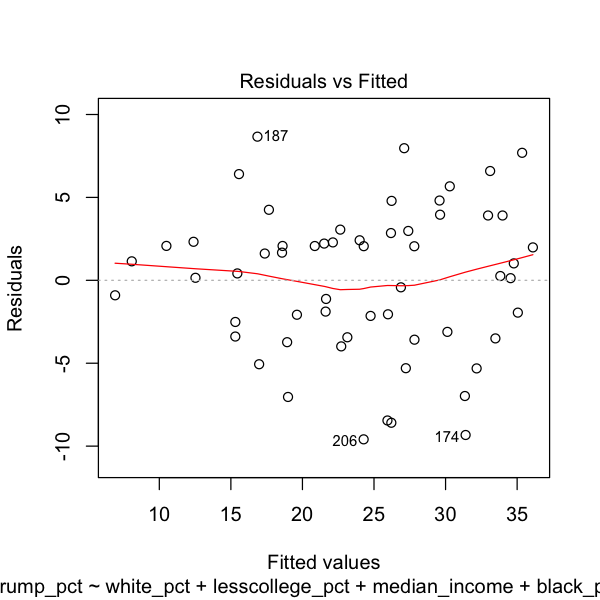

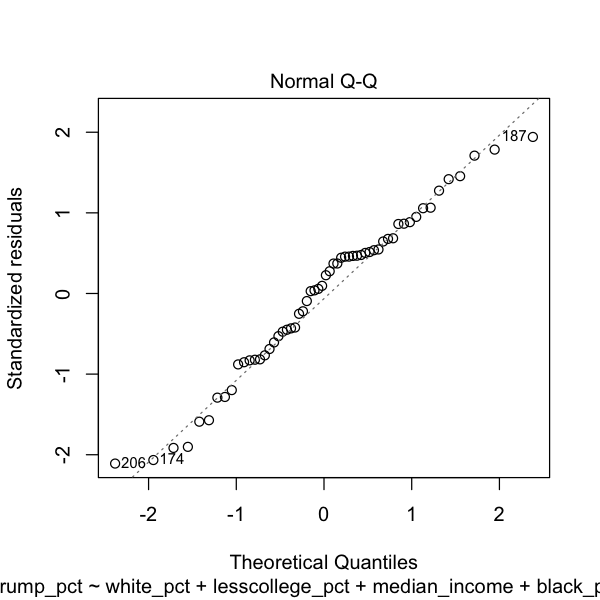

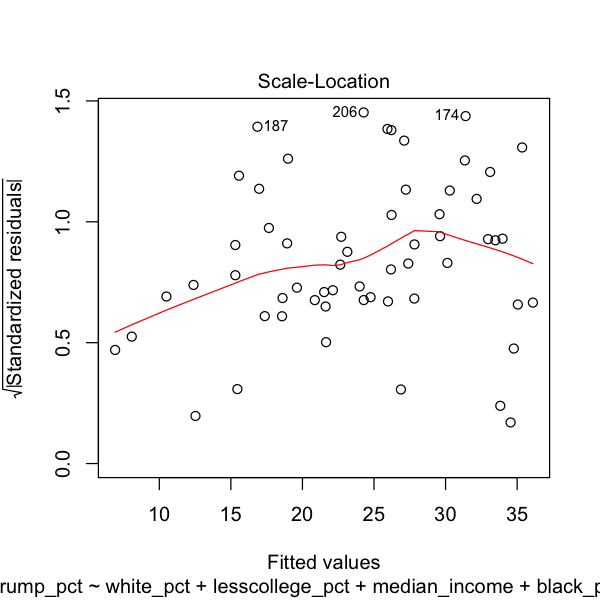

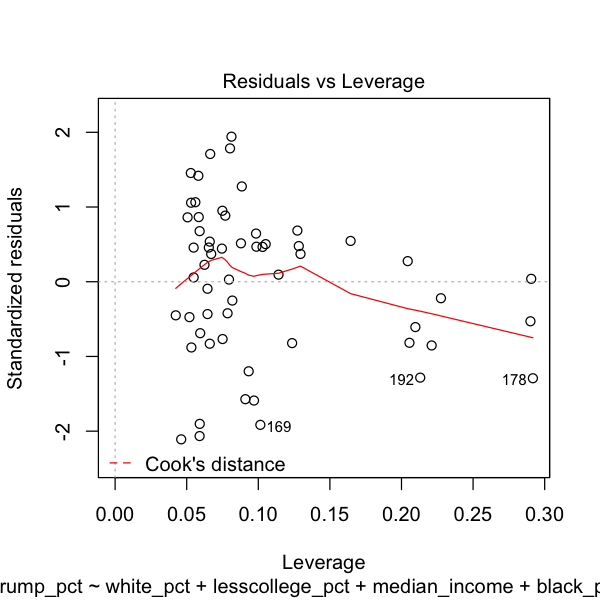

In [26]:
plot(model)

In [27]:
shapiro.test(residuals(model))


	Shapiro-Wilk normality test

data:  residuals(model)
W = 0.97595, p-value = 0.3022


In [28]:
vif(model)

white_pct lesscollege_pct   median_income       black_pct    hispanic_pct 
      12.134408        5.267710        4.499442        2.276154       10.527523

In [29]:
cor.test(california.df$hispanic_pct, california.df$white_pct)


	Pearson's product-moment correlation

data:  california.df$hispanic_pct and california.df$white_pct
t = -12.783, df = 56, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9169056 -0.7781572
sample estimates:
       cor 
-0.8629955 


In [30]:
model1 <- lm(trump_pct ~ white_pct + lesscollege_pct + median_income , data = california.df)
summary(model1)


Call:
lm(formula = trump_pct ~ white_pct + lesscollege_pct + median_income, 
    data = california.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5942 -2.7369  0.4056  2.9094  9.7024 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -5.842e+01  1.369e+01  -4.268 8.01e-05 ***
white_pct        3.270e-01  3.488e-02   9.375 6.38e-13 ***
lesscollege_pct  6.920e-01  1.141e-01   6.065 1.34e-07 ***
median_income    2.292e-04  8.055e-05   2.846  0.00624 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.638 on 54 degrees of freedom
Multiple R-squared:  0.7263,	Adjusted R-squared:  0.7111 
F-statistic: 47.76 on 3 and 54 DF,  p-value: 3.276e-15


In [31]:
model2 <- lm(trump_pct ~ white_pct + lesscollege_pct, data = california.df)
model3 <- lm(trump_pct ~ lesscollege_pct, data = california.df)

In [32]:
summary(model)$sigma
summary(model1)$sigma # This is the RSE for model 1
summary(model2)$sigma
summary(model3)$sigma

[1] 4.655296

[1] 4.638444

[1] 4.928755

[1] 7.44363

In [33]:
AIC(model)
AIC(model1)
AIC(model2)
AIC(model3)

[1] 350.6719

[1] 348.4402

[1] 354.5465

[1] 401.4152

In this case AIC and RSE point to model 1 being the best model. However we should listen to AIC and not only RSE/RSS

## Activity 7: Create more multiple linear models with the US data. Compare and find good models for the data. Select other states that interest you

# <font color='#FD7C6E'> Interaction Effects </font> 

## Activity 8: Create a new dataframe called "utah.df" with only the counties in Utah

In [34]:
utah.df <- us.df[us.df$state=="Utah",]

## Activity 9: Create the following linear model:
\begin{equation*}
Trump\% = \beta_0 + \beta_1 * White\% + \beta_2 * Median\_Income\%
\end{equation*}

In [35]:
model4 <- lm(trump_pct ~ white_pct +  median_income , data = utah.df)
summary(model4)


Call:
lm(formula = trump_pct ~ white_pct + median_income, data = utah.df)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.6744  -6.2356  -0.7059   5.4405  13.6447 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -9.9585166 14.1447960  -0.704 0.487665    
white_pct      0.6503197  0.1528770   4.254 0.000241 ***
median_income -0.0001308  0.0001105  -1.183 0.247386    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.555 on 26 degrees of freedom
Multiple R-squared:  0.4202,	Adjusted R-squared:  0.3756 
F-statistic: 9.422 on 2 and 26 DF,  p-value: 0.0008367


Interactions in the lm formula are expressed as X1 * X2 and these include X1, X2 and X1 * X2

In [36]:
model5 <- lm(trump_pct ~ white_pct*median_income , data = utah.df)
summary(model5)


Call:
lm(formula = trump_pct ~ white_pct * median_income, data = utah.df)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.6764  -4.0727   0.1067   3.1307  11.7614 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)   
(Intercept)              1.443e+02  4.733e+01   3.048  0.00537 **
white_pct               -1.123e+00  5.421e-01  -2.071  0.04880 * 
median_income           -3.401e-03  9.753e-04  -3.487  0.00182 **
white_pct:median_income  3.762e-05  1.117e-05   3.368  0.00245 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.39 on 25 degrees of freedom
Multiple R-squared:  0.6012,	Adjusted R-squared:  0.5533 
F-statistic: 12.56 on 3 and 25 DF,  p-value: 3.335e-05


R^2 increased from 0.42 to 0.6!

The interpretation of the coefficients for interactions are not intuitive as before and hard to explain

# <font color='#FD7C6E'> Polynomial Regression </font> 

In [37]:
texas.df <- us.df[us.df$state=="Texas",]
model6 <- lm(clinton_pct ~ lesscollege_pct , data = texas.df)
summary(model6)


Call:
lm(formula = clinton_pct ~ lesscollege_pct, data = texas.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.355  -4.548  -2.230   2.082  34.602 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     28.43933    5.33812   5.328 2.21e-07 ***
lesscollege_pct -0.19023    0.06504  -2.925  0.00376 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.716 on 252 degrees of freedom
Multiple R-squared:  0.03284,	Adjusted R-squared:  0.029 
F-statistic: 8.556 on 1 and 252 DF,  p-value: 0.003757


In [38]:
model7 <- lm(clinton_pct ~ lesscollege_pct + I(lesscollege_pct^2) , data = texas.df)
summary(model7)


Call:
lm(formula = clinton_pct ~ lesscollege_pct + I(lesscollege_pct^2), 
    data = texas.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.932  -4.599  -1.761   2.205  32.518 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          189.363440  30.044085   6.303 1.30e-09 ***
lesscollege_pct       -4.468831   0.789803  -5.658 4.16e-08 ***
I(lesscollege_pct^2)   0.028026   0.005158   5.434 1.30e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.313 on 251 degrees of freedom
Multiple R-squared:  0.1346,	Adjusted R-squared:  0.1277 
F-statistic: 19.53 on 2 and 251 DF,  p-value: 1.313e-08


In [39]:
model8 <- lm(clinton_pct ~ lesscollege_pct + I(lesscollege_pct^2) + I(lesscollege_pct^3), data = texas.df)
summary(model8)


Call:
lm(formula = clinton_pct ~ lesscollege_pct + I(lesscollege_pct^2) + 
    I(lesscollege_pct^3), data = texas.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.713  -4.396  -1.627   2.521  32.357 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)
(Intercept)          -3.707e+01  1.710e+02  -0.217    0.829
lesscollege_pct       4.916e+00  7.023e+00   0.700    0.485
I(lesscollege_pct^2) -9.948e-02  9.495e-02  -1.048    0.296
I(lesscollege_pct^3)  5.693e-04  4.233e-04   1.345    0.180

Residual standard error: 7.302 on 250 degrees of freedom
Multiple R-squared:  0.1409,	Adjusted R-squared:  0.1305 
F-statistic: 13.66 on 3 and 250 DF,  p-value: 2.787e-08


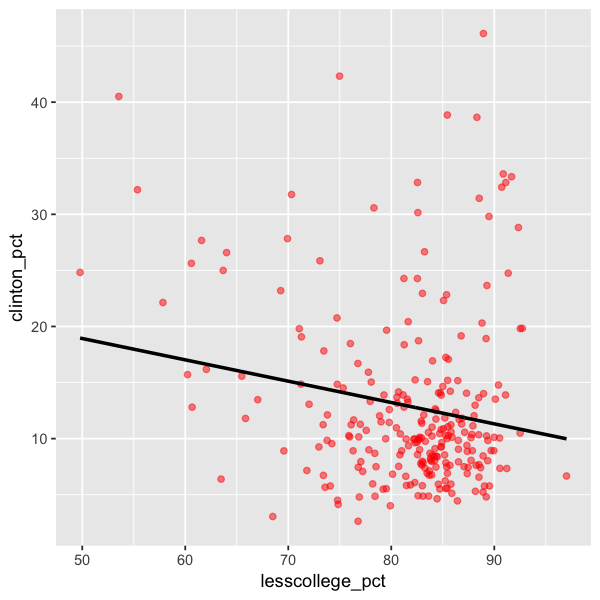

In [40]:
ggplot(data=texas.df, aes(lesscollege_pct, clinton_pct)) + geom_point(color="red", alpha = 0.5) + geom_line(data = fortify(model6), aes(y = .fitted), color="black", size=1)

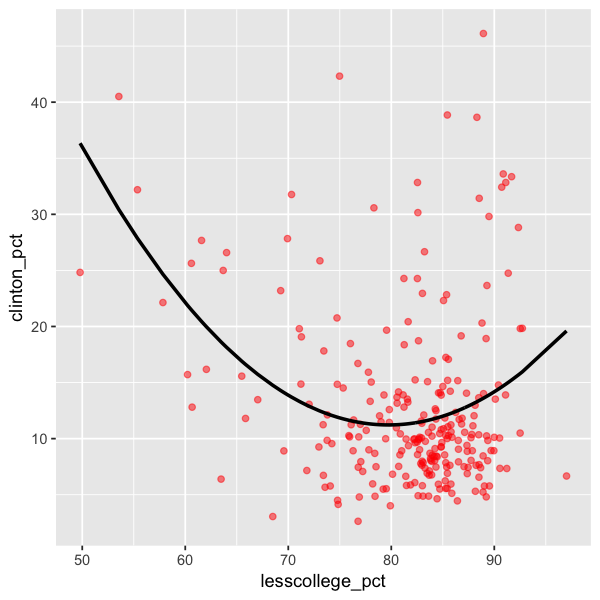

In [41]:
ggplot(data=texas.df, aes(lesscollege_pct, clinton_pct)) + geom_point(color="red", alpha = 0.5) + geom_line(data = fortify(model7), aes(y = .fitted), color="black", size=1)

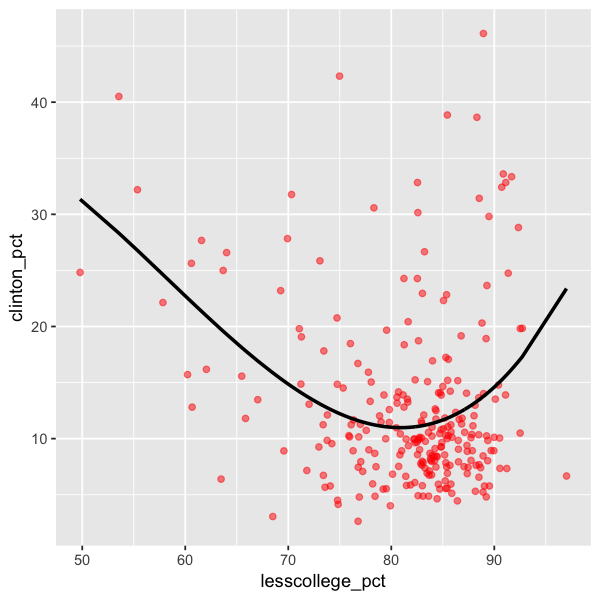

In [42]:
ggplot(data=texas.df, aes(lesscollege_pct, clinton_pct)) + geom_point(color="red", alpha = 0.5) + geom_line(data = fortify(model8), aes(y = .fitted), color="black", size=1)